In [1]:
!pip install plotly matplotlib seaborn --quiet

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import plotly.express as px
import pandas as pd
import pyarrow as py
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('C:/Users/emers/OneDrive/Documentos/TI_Estudos/Jupyter/BI/arquivos/bundesliga_player.csv')
df.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [7]:
df.club.value_counts()

FC Schalke 04      31
FC Augsburg        31
TSG Hoffenheim     31
Bor. Dortmund      30
E. Frankfurt       30
VfB Stuttgart      29
VfL Bochum         28
1.FC Köln          27
1.FSV Mainz 05     27
Bayern Munich      27
Hertha BSC         27
Union Berlin       27
Bor. M'gladbach    27
B. Leverkusen      27
SC Freiburg        26
VfL Wolfsburg      25
RB Leipzig         25
Werder Bremen      24
1.FC Köln II        5
B. Dortmund II      3
Hertha BSC U19      1
1.FC Köln U19       1
RB Leipzig U19      1
Hertha BSC II       1
W. Bremen II        1
FC Augsburg U19     1
W. Bremen U19       1
RB Leipzig U17      1
Name: club, dtype: int64

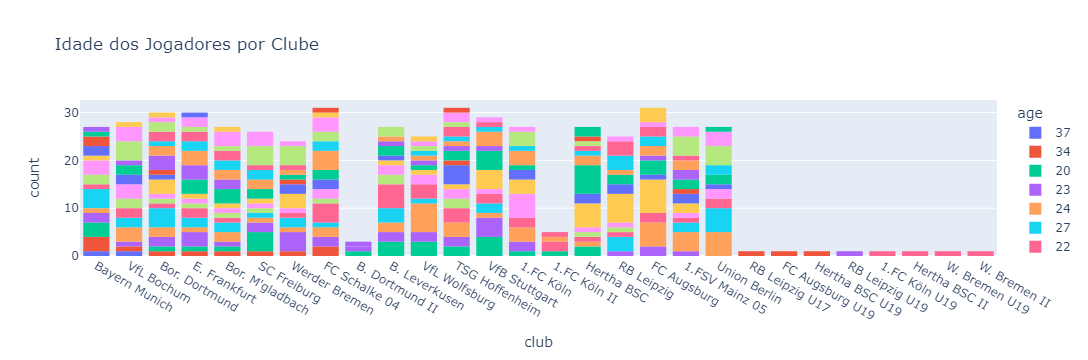

In [8]:
px.histogram(df, x='club', color='age', title='Idade dos Jogadores por Clube')

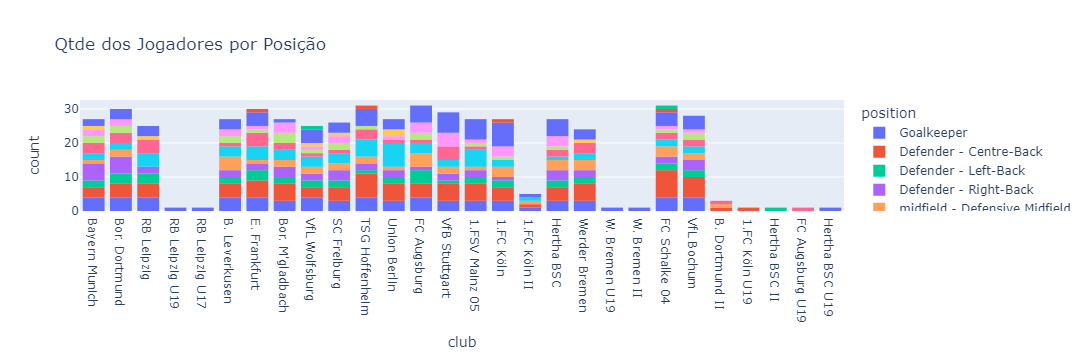

In [9]:
px.histogram(df, x='club', color='position', title='Qtde dos Jogadores por Posição')

In [11]:
# Top 10 Jogadores mais Valiosos
top_10_players = df[['name', 'club', 'price']].sort_values(by='price', ascending=False).head(10)
print("Top 10 Jogadores Mais Valiosos da Liga")
print(top_10_players)

Top 10 Jogadores Mais Valiosos da Liga
                   name           club  price
47      Jude Bellingham  Bor. Dortmund  120.0
17        Jamal Musiala  Bayern Munich  110.0
106       Florian Wirtz  B. Leverkusen   85.0
83   Christopher Nkunku     RB Leipzig   80.0
14       Joshua Kimmich  Bayern Munich   80.0
66       Josko Gvardiol     RB Leipzig   75.0
4      Matthijs de Ligt  Bayern Munich   75.0
22           Leroy Sané  Bayern Munich   70.0
7       Alphonso Davies  Bayern Munich   70.0
140   Randal Kolo Muani   E. Frankfurt   65.0


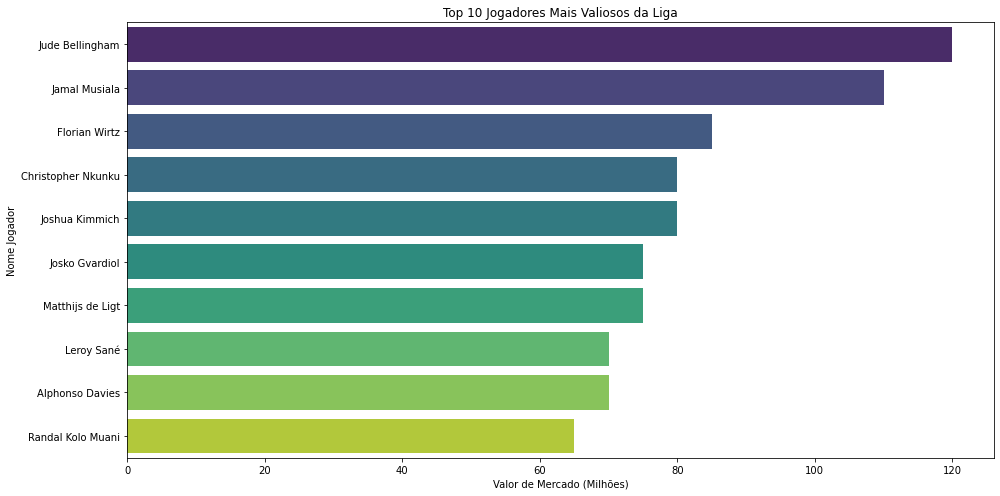

In [13]:
plt.figure(figsize=(14,7))
sns.barplot(x='price', y='name', data=top_10_players, palette='viridis')
plt.title('Top 10 Jogadores Mais Valiosos da Liga')
plt.xlabel('Valor de Mercado (Milhões)')
plt.ylabel('Nome Jogador')
plt.tight_layout()
plt.show()

In [15]:
# Clubes mais Valiosos da Liga
avg_club_value = df.groupby('club')['price'].mean().sort_values(ascending=False)
print("\nClubes Mais Valiosos da Liga: ")
print(avg_club_value)


Clubes Mais Valiosos da Liga: 
club
Bayern Munich      36.285185
RB Leipzig         20.287500
Bor. Dortmund      18.193333
B. Leverkusen      15.624074
E. Frankfurt       10.153448
Bor. M'gladbach     8.576923
VfL Wolfsburg       8.028000
SC Freiburg         6.226923
TSG Hoffenheim      4.988710
Union Berlin        4.670370
1.FSV Mainz 05      4.211111
VfB Stuttgart       3.998276
FC Augsburg         3.779032
1.FC Köln           3.723148
Hertha BSC          3.383333
Werder Bremen       3.337500
FC Schalke 04       1.935484
VfL Bochum          1.705357
Hertha BSC II       0.750000
B. Dortmund II      0.633333
W. Bremen U19       0.300000
Hertha BSC U19      0.250000
RB Leipzig U19      0.200000
RB Leipzig U17      0.200000
1.FC Köln II        0.180000
W. Bremen II        0.150000
1.FC Köln U19            NaN
FC Augsburg U19          NaN
Name: price, dtype: float64


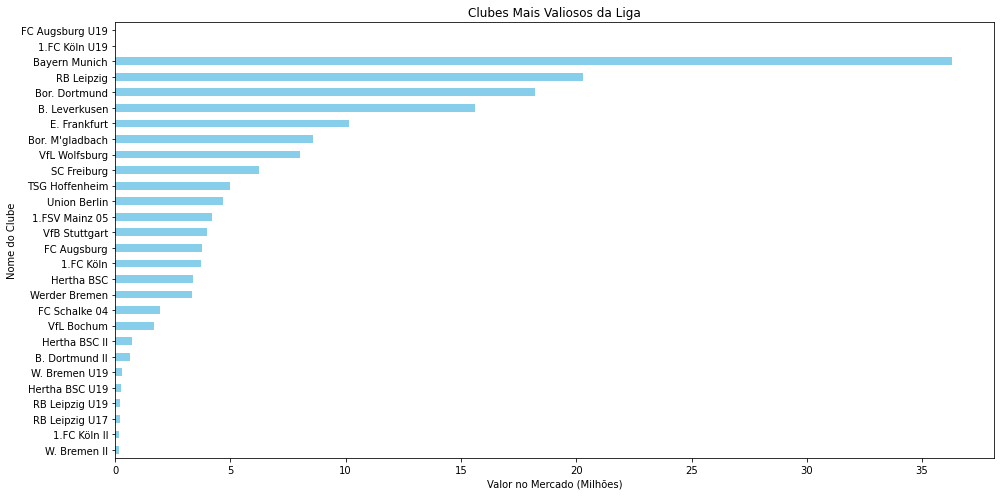

In [16]:
plt.figure(figsize=(14,7))
avg_club_value.sort_values().plot(kind='barh', color='skyblue')
plt.title('Clubes Mais Valiosos da Liga')
plt.xlabel('Valor no Mercado (Milhões)')
plt.ylabel('Nome do Clube')
plt.tight_layout()
plt.show()